In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col='ID_code')

In [3]:
print(train.shape)
train.head()

(200000, 201)


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
y = train['target']
print(y.shape)
y.head()

(200000,)


ID_code
train_0    0
train_1    0
train_2    0
train_3    0
train_4    0
Name: target, dtype: int64

In [5]:
x = train.loc[:, train.columns != 'target']
print(x.shape)
x.head()

(200000, 200)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Hold Out Validation Data Split

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [7]:
x_train.shape, y_train.shape

((140000, 200), (140000,))

In [8]:
x_test.shape, y_test.shape

((60000, 200), (60000,))

## Random Forest Parameter tuning

### [3.2.4.3.1 sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


### 1. Max_depth
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. 
##### (default = None)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

accuracy_1 =[]
max_depth_list_1=range(20,50)

for max_depth in max_depth_list_1:
    model_1 = RandomForestClassifier(random_state=37, max_depth= max_depth)
    model_1.fit(x_train, y_train)
    
    y_train_predict = model_1.predict(x_train)
    y_test_predict = model_1.predict(x_test)
        
    train_roc_auc_score = roc_auc_score(y_train, y_train_predict)
    test_roc_auc_score = roc_auc_score(y_test, y_test_predict)
    
    accuracy_1.append({
        'max_depth' : max_depth,
        'train_score': train_roc_auc_score,
        'test_score' : test_roc_auc_score
    })
    if max_depth % 10 == 0: 
        print('max_depth: %.0f' % max_depth)
        print('train_score: %.3f' %train_roc_auc_score)
        print('test_score: %.3f' % test_roc_auc_score)

C:\Users\SKTelecom\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


max_depth: 20
train_score: 0.657
test_score: 0.506
max_depth: 30
train_score: 0.827
test_score: 0.514
max_depth: 40
train_score: 0.912
test_score: 0.514


In [10]:
val_score = pd.DataFrame(accuracy_1)

In [11]:
val_score.head()

,max_depth,test_score,train_score
0,20,0.505893,0.656582
1,21,0.509181,0.685598
2,22,0.509009,0.699835
3,23,0.509260,0.722971
4,24,0.512769,0.742185


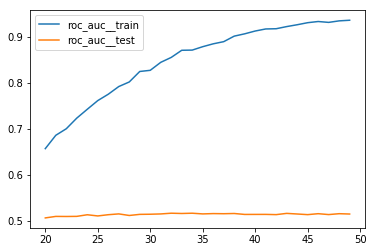

In [12]:
plt.plot(val_score['max_depth'], val_score['train_score'], label='roc_auc__train')
plt.plot(val_score['max_depth'], val_score['test_score'], label='roc_auc__test')
plt.legend()

### 2. N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.
#### (default = 100)

In [16]:
accuracy=[]
N_estimators_list= [1,2,4,8,16,32,64,100,200]

for n_estimator in N_estimators_list:
    model = RandomForestClassifier(
        random_state=37, 
        n_estimators = n_estimator
    )
    
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
        
    train_roc_auc_score = roc_auc_score(y_train, y_train_predict)
    test_roc_auc_score = roc_auc_score(y_test, y_test_predict)
    
    accuracy.append({
        'n_estimator' : n_estimator,
        'train_score': train_roc_auc_score,
        'test_score' : test_roc_auc_score
    })

    print('n_estimator: %.0f' % n_estimator)
    print('train_score: %.3f' %train_roc_auc_score)
    print('test_score: %.3f' % test_roc_auc_score)

n_estimator: 1
train_score: 0.794
test_score: 0.556
n_estimator: 2
train_score: 0.792
test_score: 0.524
n_estimator: 4
train_score: 0.864
test_score: 0.530
n_estimator: 8
train_score: 0.904
test_score: 0.518
n_estimator: 16
train_score: 0.919
test_score: 0.506
n_estimator: 32
train_score: 0.928
test_score: 0.501
n_estimator: 64
train_score: 0.938
test_score: 0.500
n_estimator: 100
train_score: 0.941
test_score: 0.500
n_estimator: 200
train_score: 0.947
test_score: 0.500


In [19]:
val_score = pd.DataFrame(accuracy)
val_score.head()

""


In [18]:
plt.plot(val_score['n_estimator'], val_score['train_score'], label='roc_auc__train')
plt.plot(val_score['n_estimator'], val_score['test_score'], label='roc_auc__test')
plt.legend()

KeyError: 'n_estimator'

### 3. min_samples_split
The minimum number of samples required to split an internal node:
* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

##### (default=2)

In [25]:
accuracy=[]
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)

for i in min_samples_splits :
    model = RandomForestClassifier(
        random_state=37, 
        min_samples_split = i
    )
    
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
        
    train_roc_auc_score = roc_auc_score(y_train, y_train_predict)
    test_roc_auc_score = roc_auc_score(y_test, y_test_predict)
    
    accuracy.append({
        'min_samples_split' : i,
        'train_score': train_roc_auc_score,
        'test_score' : test_roc_auc_score
    })

    print('min_samples_split: %.3f' % i)
    print('train_score: %.3f' %train_roc_auc_score)
    print('test_score: %.3f' % test_roc_auc_score)

min_samples_split: 0.100
train_score: 0.500
test_score: 0.500
min_samples_split: 0.200
train_score: 0.500
test_score: 0.500
min_samples_split: 0.300
train_score: 0.500
test_score: 0.500
min_samples_split: 0.400
train_score: 0.500
test_score: 0.500
min_samples_split: 0.500
train_score: 0.500
test_score: 0.500
min_samples_split: 0.600
train_score: 0.500
test_score: 0.500
min_samples_split: 0.700
train_score: 0.500
test_score: 0.500
min_samples_split: 0.800
train_score: 0.500
test_score: 0.500
min_samples_split: 0.900
train_score: 0.500
test_score: 0.500
min_samples_split: 1.000
train_score: 0.500
test_score: 0.500


In [26]:
val_score = pd.DataFrame(accuracy)

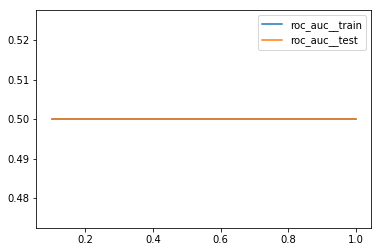

In [27]:
plt.plot(val_score['min_samples_split'], val_score['train_score'], label='roc_auc__train')
plt.plot(val_score['min_samples_split'], val_score['test_score'], label='roc_auc__test')
plt.legend()

### 4. min_samples_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider min_samples_leaf as the minimum number.
* If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

##### default =1

In [30]:
accuracy=[]
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)

for i in min_samples_splits :
    model = RandomForestClassifier(
        random_state=37, 
        min_samples_leaf = i
    )
    
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
        
    train_roc_auc_score = roc_auc_score(y_train, y_train_predict)
    test_roc_auc_score = roc_auc_score(y_test, y_test_predict)
    
    accuracy.append({
        'min_samples_leaf' : i,
        'train_score': train_roc_auc_score,
        'test_score' : test_roc_auc_score
    })

    print('min_samples_leaf: %.3f' % i)
    print('train_score: %.3f' %train_roc_auc_score)
    print('test_score: %.3f' % test_roc_auc_score)

min_samples_leaf: 0.100
train_score: 0.500
test_score: 0.500
min_samples_leaf: 0.200
train_score: 0.500
test_score: 0.500
min_samples_leaf: 0.300
train_score: 0.500
test_score: 0.500
min_samples_leaf: 0.400
train_score: 0.500
test_score: 0.500
min_samples_leaf: 0.500
train_score: 0.500
test_score: 0.500


ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

### 5. max_features
max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:
* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

In [ ]:
accuracy=[]
max_features = list(range(1, x_train.shape[1]))

for i in max_features :
    model = RandomForestClassifier(
        random_state=37, 
        min_samples_leaf = i
    )
    
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
        
    train_roc_auc_score = roc_auc_score(y_train, y_train_predict)
    test_roc_auc_score = roc_auc_score(y_test, y_test_predict)
    
    accuracy.append({
        'max_features' : i,
        'train_score': train_roc_auc_score,
        'test_score' : test_roc_auc_score
    })

    print('max_features: %.3f' % i)
    print('train_score: %.3f' %train_roc_auc_score)
    print('test_score: %.3f' % test_roc_auc_score)

max_features: 1.000
train_score: 0.927
test_score: 0.506
max_features: 2.000
train_score: 0.884
test_score: 0.507
max_features: 3.000
train_score: 0.811
test_score: 0.506
max_features: 4.000
train_score: 0.737
test_score: 0.505
max_features: 5.000
train_score: 0.680
test_score: 0.505
max_features: 6.000
train_score: 0.634
test_score: 0.503
max_features: 7.000
train_score: 0.598
test_score: 0.503
max_features: 8.000
train_score: 0.574
test_score: 0.502
max_features: 9.000
train_score: 0.554
test_score: 0.501
